In [ ]:
import warnings
warnings.filterwarnings('ignore')  # Hide warnings
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates


In [ ]:
import plotly.express as px

In [ ]:
!pip install pandas_profiling==3.2.0

  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
ERROR: spacy 3.2.4 has requirement typing-extensions<4.0.0.0,>=3.7.4; python_version < "3.8", but you'll have typing-extensions 4.2.0 which is incompatible.
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Not uninstalling markupsafe at /shared-libs/python3.7/py-core/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'MarkupSafe'. No files were found to uninstall.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2022,4,29)

In [ ]:
btc = web.DataReader("BTC-USD", 'yahoo', start, end)  # Collects data
btc.reset_index(inplace=True)
#bitcoin

#bitcoin

crypto= btc[['Date','Adj Close']]
crypto= crypto.rename(columns = {'Adj Close':'BTC'})

# 7 day moving average

crypto[ 'BTC_7DAY_MA' ] = crypto.BTC.rolling( 7).mean()

In [ ]:
#Ethereum

eth = web.DataReader("ETH-USD", 'yahoo', start, end)  # Collects data
eth.reset_index(inplace=True)
crypto["ETH"]= eth["Adj Close"]

# 7 day moving average
crypto[ 'ETH_7DAY_MA' ] = crypto.ETH.rolling( 7).mean()

In [ ]:
#doge coin

doge = web.DataReader("DOGE-USD", 'yahoo', start, end)  # Collects data
doge.reset_index(inplace=True)
crypto["DOGE"]= doge["Adj Close"]

# 7 day moving average
crypto[ 'DOGE_7DAY_MA' ] = crypto.DOGE.rolling( 7).mean()

In [ ]:
#BinanceCoin 

bnb = web.DataReader("BNB-USD", 'yahoo', start, end)  # Collects data
bnb.reset_index(inplace=True)
crypto["BNB"]= bnb["Adj Close"]

# 7 day moving average
crypto[ 'BNB_7DAY_MA' ] = crypto.BNB.rolling( 7).mean()

In [ ]:
#Cardano

ada = web.DataReader("ADA-USD", 'yahoo', start, end)  # Collects data
ada.reset_index(inplace=True)
crypto["ADA"]= ada["Adj Close"]


# 7 day moving average

In [ ]:
#XRP

xrp = web.DataReader("XRP-USD", 'yahoo', start, end)  # Collects data
xrp.reset_index(inplace=True)
crypto["XRP"]= xrp["Adj Close"]

# 7 day moving average
crypto[ 'XRP_7DAY_MA' ] = crypto.XRP.rolling( 7).mean()

In [ ]:
#Dash

dash = web.DataReader("DASH-USD", 'yahoo', start, end)  # Collects data
dash.reset_index(inplace=True)
crypto["DASH"]= dash["Adj Close"]

# 7 day moving average

In [ ]:
#Luna

luna = web.DataReader("LUNA-USD", 'yahoo', start, end)  # Collects data
luna.reset_index(inplace=True)
crypto["LUNA"]= luna["Adj Close"]

# 7 day moving average

In [ ]:
luna

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-01-01,0.002954,0.002049,0.002901,0.002937,0,0.002937
1,2021-01-02,0.003316,0.002378,0.002937,0.002567,0,0.002567
2,2021-01-03,0.003461,0.002564,0.002571,0.003283,0,0.003283
3,2021-01-04,0.003344,0.002638,0.003274,0.003197,0,0.003197
4,2021-01-05,0.003444,0.002161,0.003197,0.003399,0,0.003399
...,...,...,...,...,...,...,...
480,2022-04-26,0.003257,0.003031,0.003236,0.003049,0,0.003049
481,2022-04-27,0.004728,0.003040,0.003050,0.004709,9,0.004709
482,2022-04-28,0.004832,0.004673,0.004709,0.004773,0,0.004773
483,2022-04-29,0.004786,0.004588,0.004772,0.004633,0,0.004633


In [ ]:
#getting the dates 

crypto.set_index("Date", inplace=True)

In [ ]:
crypto[['BTC','ETH','DOGE','BNB','ADA','XRP','DASH','LUNA']].head()

,BTC,ETH,DOGE,BNB,ADA,XRP,DASH,LUNA
Date,,,,,,,,
2021-01-01,29374.152344,730.367554,0.005685,37.905010,0.175350,0.237444,88.241707,0.002937
2021-01-02,32127.267578,774.534973,0.010615,38.241592,0.177423,0.221655,86.969772,0.002567
2021-01-03,32782.023438,975.507690,0.009771,41.148979,0.204995,0.225848,89.069138,0.003283
2021-01-04,31971.914062,1040.233032,0.009767,40.926353,0.224762,0.236677,88.797173,0.003197
2021-01-05,33992.429688,1100.006104,0.009920,41.734600,0.258314,0.226750,89.102776,0.003399


In [ ]:
crypto[['BTC','ETH','DOGE','BNB','ADA','XRP','DASH','LUNA']].corr()

,BTC,ETH,DOGE,BNB,ADA,XRP,DASH,LUNA
BTC,1.000000,0.508597,0.183546,0.566874,0.455787,0.552766,0.655579,0.369776
ETH,0.508597,1.000000,0.537642,0.873392,0.641120,0.675155,0.157474,0.536671
DOGE,0.183546,0.537642,1.000000,0.629126,0.655578,0.783060,0.526559,0.474049
BNB,0.566874,0.873392,0.629126,1.000000,0.593022,0.816855,0.383310,0.581977
ADA,0.455787,0.641120,0.655578,0.593022,1.000000,0.714699,0.468657,0.529575
XRP,0.552766,0.675155,0.783060,0.816855,0.714699,1.000000,0.638451,0.468079
DASH,0.655579,0.157474,0.526559,0.383310,0.468657,0.638451,1.000000,0.295157
LUNA,0.369776,0.536671,0.474049,0.581977,0.529575,0.468079,0.295157,1.000000


<AxesSubplot:>

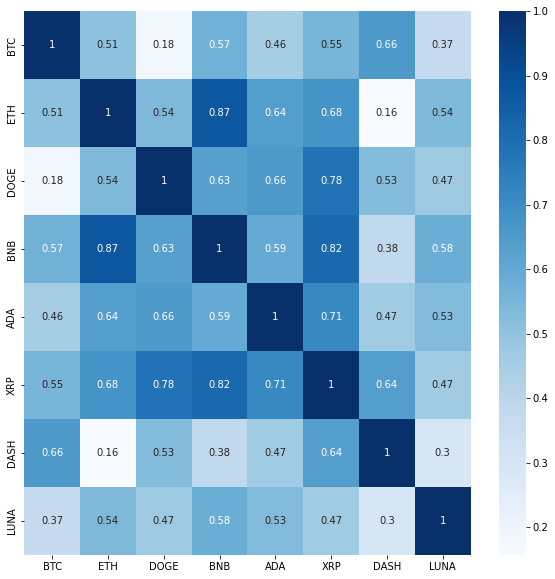

In [ ]:
#heatmap

plt.figure(figsize = (10,10))
sns.heatmap(crypto[['BTC','ETH','DOGE','BNB','ADA','XRP','DASH','LUNA']].corr(),annot=True, cmap='Blues')

In [ ]:
fig = px.line(crypto, y=["BTC",'ETH','DOGE','BNB','ADA','XRP','DASH'] )
fig.show()

In [ ]:
fig = px.line(crypto, y=['BTC_7DAY_MA'] )
fig.show()

In [ ]:
fig=px.line(crypto,y=['ETH_7DAY_MA'] )
fig.show()

In [ ]:
crypto

,BTC,BTC_7DAY_MA,ETH,ETH_7DAY_MA,DOGE,DOGE_7DAY_MA,BNB,BNB_7DAY_MA,ADA,XRP,XRP_7DAY_MA,DASH,LUNA
Date,,,,,,,,,,,,,
2021-01-01,29374.152344,NaN,730.367554,NaN,0.005685,NaN,37.905010,NaN,0.175350,0.237444,NaN,88.241707,0.002937
2021-01-02,32127.267578,NaN,774.534973,NaN,0.010615,NaN,38.241592,NaN,0.177423,0.221655,NaN,86.969772,0.002567
2021-01-03,32782.023438,NaN,975.507690,NaN,0.009771,NaN,41.148979,NaN,0.204995,0.225848,NaN,89.069138,0.003283
2021-01-04,31971.914062,NaN,1040.233032,NaN,0.009767,NaN,40.926353,NaN,0.224762,0.236677,NaN,88.797173,0.003197
2021-01-05,33992.429688,NaN,1100.006104,NaN,0.009920,NaN,41.734600,NaN,0.258314,0.226750,NaN,89.102776,0.003399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-26,38117.460938,39881.979353,2808.298340,2958.371547,0.137767,0.139365,385.483063,402.993487,0.827645,0.641699,0.706731,93.270164,0.003049
2022-04-27,39241.121094,39577.228237,2888.929688,2931.397810,0.139700,0.139196,391.445831,399.149427,0.840595,0.652318,0.692466,95.617142,0.004709
2022-04-28,39773.828125,39469.580357,2936.940918,2924.177839,0.137363,0.139339,406.718201,399.391820,0.843950,0.644363,0.679778,96.568245,0.004773


In [ ]:
import sweetviz as sv

In [ ]:
df = crypto.loc[:,~crypto.columns.str.contains('MA')]

In [ ]:
Report= sv.analyze(df)


                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
Report.show_html("Analized report.html")


Report Analized report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d3e683f-6e61-41cd-8b10-c5507e9efee2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>